In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns ; sns.set()

# Prédire un genre musical

Voici le jeu de données `dataset.csv` qui contient la description d'oeuvres de musique du Bengladesh. Chaque titre est associé à un genre qu'il s'agira de prédire (colonne `label`). 

Les autres champs sont des caractéristiques issues du signal sonore : analyse spectrale du signal, et mfcc (Mel-frequency cepstral coefficients) venant de la représentation en temps-fréquence du signal par exemple. C'est donc assez technique et spécifique et vous n'avez pas trop besoin de comprendre cette représentation dans le détail pour faire le devoir! 

**Question** Observer les statistiques descriptives, commenter en indiquant 

1. Si vous devez garder tous les champs et pourquoi.
2. Si ces champs doivent être renormalisés ou pas et pourquoi.


In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.describe()

,zero_crossing,spectral_centroid,spectral_rolloff,spectral_bandwidth,chroma_frequency,rmse,delta,melspectogram,tempo,mfcc0,...,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19
count,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1.742000e+03,1742.000000,1742.000000,1742.000000,...,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000
mean,215007.465557,2015.700468,4100.426211,2043.560009,0.305385,0.171471,-1.743660e-09,8.522913,123.112315,-138.582862,...,-5.938094,0.117813,-5.085212,-1.104625,-4.488481,-0.222948,-4.636100,0.331630,-4.160293,-0.704487
std,89920.930842,721.696480,1597.279461,666.244323,0.072464,0.075168,1.393930e-07,7.374733,21.849677,85.633145,...,6.209327,5.985646,5.253280,5.643891,4.682304,4.659930,4.515759,4.447436,4.531011,4.433841
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.676001e-06,0.000000,73.828125,-1131.370850,...,-34.208005,-25.692529,-24.642862,-26.359570,-23.886369,-20.935224,-21.520218,-17.205040,-24.743798,-16.665104
25%,152359.000000,1533.507050,2962.049702,1699.097722,0.249591,0.118410,-6.728298e-08,3.576854,107.666016,-191.413937,...,-9.524024,-3.046898,-8.325668,-3.995158,-7.407150,-2.824771,-7.600435,-2.115535,-6.914308,-3.256649
50%,196971.500000,2033.964745,4226.889780,2223.573271,0.294676,0.160642,1.617425e-10,6.477533,123.046875,-127.380986,...,-5.536915,0.643217,-4.750612,-0.513353,-4.537535,0.162360,-4.908912,0.495084,-4.428667,-0.535849
75%,257056.250000,2495.077302,5258.493696,2532.093962,0.351839,0.214249,6.924068e-08,11.528968,135.999178,-78.053853,...,-1.902947,3.916396,-1.735095,2.440787,-1.597814,2.756847,-2.071220,3.124587,-1.830402,2.015320
max,757737.000000,5323.086970,8810.877261,3252.209261,0.616620,0.628826,6.417627e-07,83.923833,184.570312,103.939519,...,14.841292,20.077568,14.958208,16.891013,24.020983,20.451894,19.347293,19.915842,21.322978,20.967689


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1742 entries, 0 to 1741
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   file_name           1742 non-null   object 
 1   zero_crossing       1742 non-null   int64  
 2   spectral_centroid   1742 non-null   float64
 3   spectral_rolloff    1742 non-null   float64
 4   spectral_bandwidth  1742 non-null   float64
 5   chroma_frequency    1742 non-null   float64
 6   rmse                1742 non-null   float64
 7   delta               1742 non-null   float64
 8   melspectogram       1742 non-null   float64
 9   tempo               1742 non-null   float64
 10  mfcc0               1742 non-null   float64
 11  mfcc1               1742 non-null   float64
 12  mfcc2               1742 non-null   float64
 13  mfcc3               1742 non-null   float64
 14  mfcc4               1742 non-null   float64
 15  mfcc5               1742 non-null   float64
 16  mfcc6 

In [7]:
df.nunique()

file_name             1742
zero_crossing         1717
spectral_centroid     1721
spectral_rolloff      1721
spectral_bandwidth    1721
chroma_frequency      1721
rmse                  1721
delta                 1721
melspectogram         1721
tempo                   21
mfcc0                 1721
mfcc1                 1721
mfcc2                 1721
mfcc3                 1721
mfcc4                 1721
mfcc5                 1721
mfcc6                 1721
mfcc7                 1721
mfcc8                 1721
mfcc9                 1721
mfcc10                1721
mfcc11                1721
mfcc12                1721
mfcc13                1721
mfcc14                1721
mfcc15                1721
mfcc16                1721
mfcc17                1721
mfcc18                1721
mfcc19                1721
label                    6
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f67c52bd6d0>,
      dtype=object)

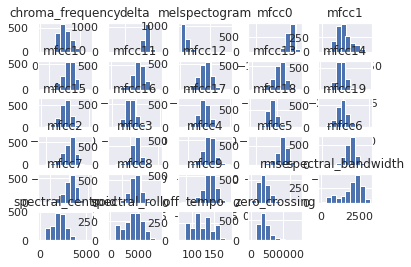

In [23]:
df.hist()

Rep:

- D'après la description on remarque que le champ *file_name* n'est pas important pour nous.
- ~~On remarque que la plupart des att sont continues, il va falloir les normalisés. (*?*) (invalide!)~~

Rep2
- Nous devons normaliser les att qui ont un std élevé. => Les données sont trop éparpillées !
- on peut spécifier un threshold de 6.
=> pas eu le temps pour l'implem

In [70]:
from sklearn.preprocessing import StandardScaler

att_cont = [
    "zero_crossing",
    "spectral_centroid",
    "spectral_rolloff",
    "spectral_bandwidth",
    "chroma_frequency",
    "rmse",
    "delta",
    "melspectogram", 
    "mfcc0",
    "mfcc1",
    "mfcc2",
    "mfcc3",
    "mfcc4",
    "mfcc5",
    "mfcc6",
    "mfcc7",
    "mfcc8",
    "mfcc9",
    "mfcc10",
    "mfcc11",
    "mfcc12",
    "mfcc13",
    "mfcc14",
    "mfcc15",
    "mfcc16",
    "mfcc17",
    "mfcc18",
    "mfcc19"
]


att_cont2 = [
    "zero_crossing",
    "spectral_centroid",
    "spectral_rolloff",
    "spectral_bandwidth",
    "melspectogram",
    "tempo",
    "mfcc0"
]

scale = StandardScaler()
scale.fit(df[att_cont])

df_scaled = scale.transform(df[att_cont])

df_scaled = np.hstack((df_scaled, df['tempo'].values.reshape(-1,1), df['label'].values.reshape(-1,1)))
print(df_scaled.shape)

(1742, 30)
[-0.9965331610046186 -0.3393135182582712 -0.1295393318760822
 0.5573889293963691 0.1437053148080201 0.6797481518911228
 -0.5372912967409905 0.6042352352803123 0.35833569976824825
 0.22485051711672355 1.3057486102975935 -0.13119511139924195
 0.8910108495608978 0.45641678409343106 0.3777899601572674
 -0.11666949996258798 0.009098781197996215 0.13068382555786776
 0.1026616052096044 0.5092269486933488 0.2319279390138273
 1.1395484860414433 1.2101832111620032 -0.1214544044842903
 -0.37815966553706887 0.4850295232099278 0.9288275266420938
 1.7859635455127811 172.265625 'adhunik']


**Question** 

- À quel type précisément de problème faites vous face ?
- À la vue de quelques statistiques élémentaires, quel serait le taux de réussite de la règle la plus idiote ?
- Vérifier cela avec sklearn.

Rep: C'est un problème de classification

In [56]:
df["label"].value_counts()

nazrul        312
rabindra      297
hiphop        295
band          295
adhunik       283
palligeeti    260
Name: label, dtype: int64

=> *nazrul* est la classe dominante.

In [37]:
taux_reussite_idiot = 312 / (312+297+295+295+283+260) 
print(taux_reussite_idiot)

0.1791044776119403


In [38]:
from sklearn.dummy import DummyClassifier
dummy_clf_mf = DummyClassifier(strategy="most_frequent")

In [47]:
dummy_clf_mf.fit(df.drop(columns=['label', 'file_name']), df["label"])
dummy_clf_mf.predict(df.drop(columns=['label', 'file_name']))
dummy_clf_mf.score(df.drop(columns=['label', 'file_name']), df["label"])

0.1791044776119403

**Question** 

1. Préparer les variables `X` et `y` contenant les champs décrivant les données (ceux que vous conservez) et les labels.
2. Appliquer des transformations si nécessaire
3. Recréer également un dataframe contenant les données `X` avec leur nom de champ (nécessaire pour faciliter le tracé des diagrammes suivants).


In [76]:
X = df_scaled[:,0:29]
y = df["label"]

print(X.shape)
print(y.shape)

(1742, 29)
(1742,)


In [80]:
X_df = pd.DataFrame(X, columns=att_cont + ["tempo"])
X_df.describe()

,zero_crossing,spectral_centroid,spectral_rolloff,spectral_bandwidth,chroma_frequency,rmse,delta,melspectogram,mfcc0,mfcc1,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,tempo
count,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.0000,1742.000000,1742.000000,1742.000000,...,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000
unique,1717.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.0000,1721.000000,1721.000000,1721.000000,...,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,21.000000
top,-0.196378,-0.379924,0.739692,0.426332,-0.873712,-1.117044,-1.3166,-0.436847,0.244818,-0.239266,...,0.673922,-0.645978,1.121888,0.626304,0.793986,-1.018007,-0.349384,0.563426,-0.378865,129.199219
freq,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,187.000000


**Question** Avec `distplot` affichez l'estimation de densité de `chroma_frequency`

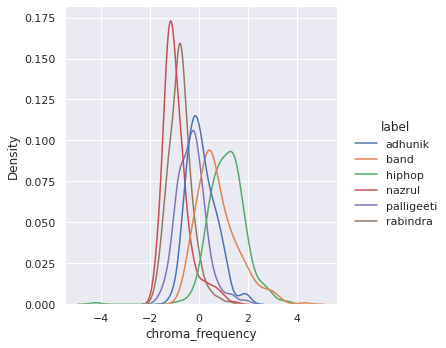

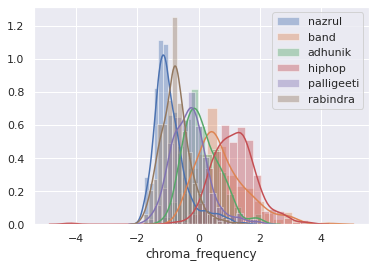

In [108]:
sns.distplot(X_df[y == "nazrul"]["chroma_frequency"], label="nazrul")
sns.distplot(X_df[y == "band"]["chroma_frequency"], label="band")
sns.distplot(X_df[y == "adhunik"]["chroma_frequency"], label="adhunik")
sns.distplot(X_df[y == "hiphop"]["chroma_frequency"], label="hiphop")
sns.distplot(X_df[y == "palligeeti"]["chroma_frequency"], label="palligeeti")
sns.distplot(X_df[y == "rabindra"]["chroma_frequency"], label="rabindra")
plt.legend()
plt.show()

**Question bonus** 

- Si vous avez le temps à la fin, tracez ceci

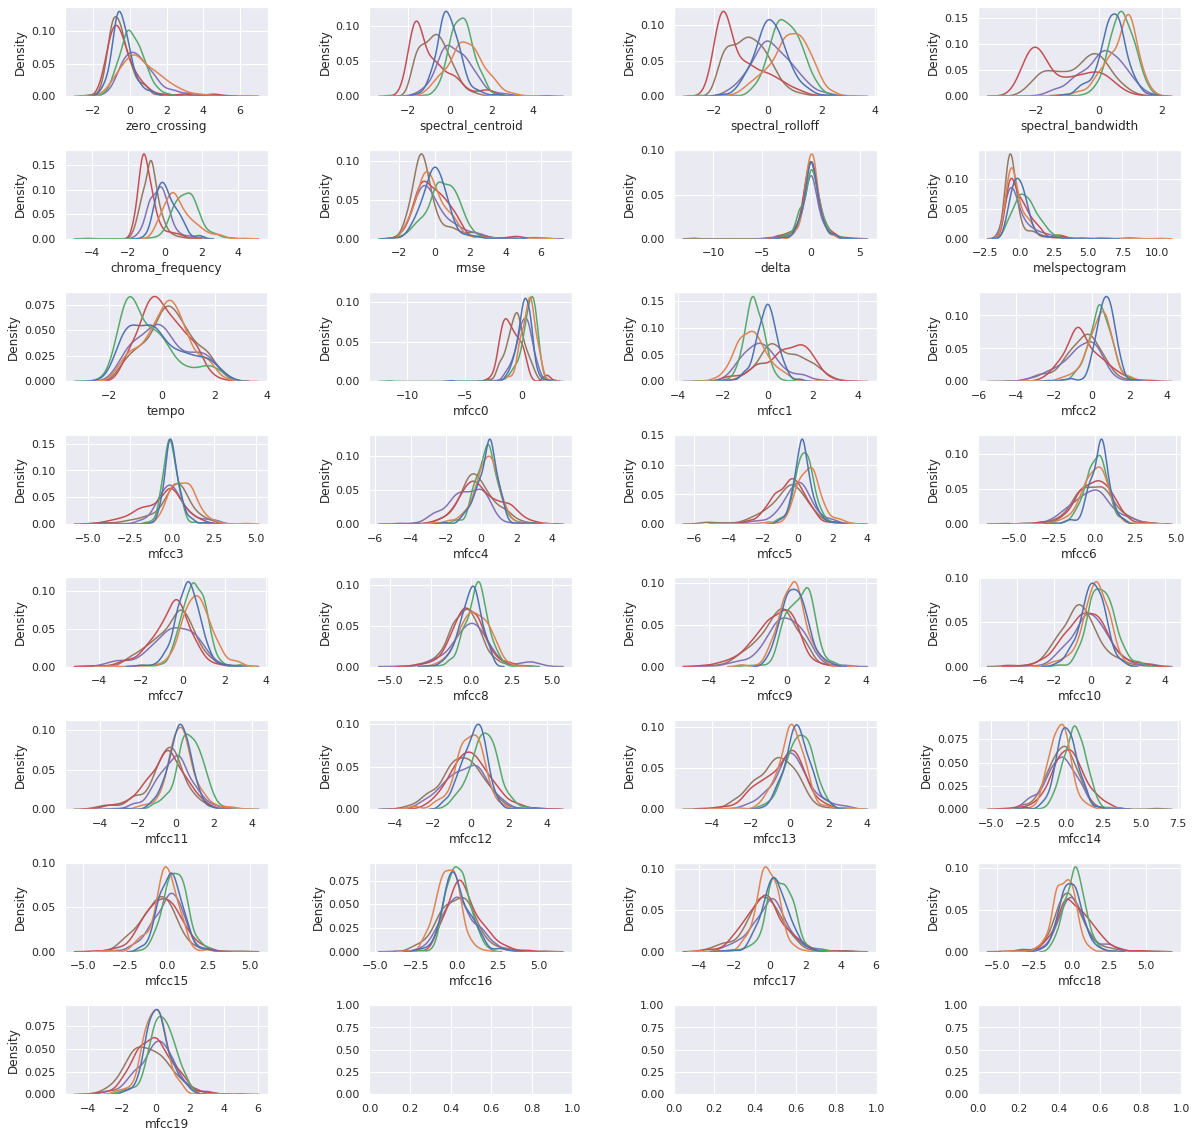

**Question** Pensez-vous qu'on puisse apprendre un modèle qui fasse mieux que la règle majoritaire ? Pourquoi ?

Oui, car la règle majoritaire reste assez "basique". Elle ne prend pas en compte tous les features.

**Question** Afficher les correlations entre champs. Que constatez-vous ?

In [109]:
correlations = df.corr(method='pearson')
correlations

,zero_crossing,spectral_centroid,spectral_rolloff,spectral_bandwidth,chroma_frequency,rmse,delta,melspectogram,tempo,mfcc0,...,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19
zero_crossing,1.000000,0.836705,0.714102,0.511658,0.398226,0.030248,-0.000701,-0.039075,0.024012,0.463207,...,0.053979,0.235931,-0.090805,0.211259,-0.082041,0.175625,-0.092151,0.118193,-0.110052,0.134052
spectral_centroid,0.836705,1.000000,0.974970,0.883767,0.632987,0.079660,-0.009338,0.029239,-0.035863,0.697601,...,0.185232,0.438312,0.024155,0.386237,-0.002493,0.299043,-0.151593,0.286027,-0.141790,0.253802
spectral_rolloff,0.714102,0.974970,1.000000,0.942248,0.669192,0.089093,-0.005574,0.047097,-0.052414,0.720824,...,0.226533,0.468162,0.067462,0.414394,0.013595,0.312249,-0.161499,0.303749,-0.142500,0.259022
spectral_bandwidth,0.511658,0.883767,0.942248,1.000000,0.658648,0.088186,-0.000997,0.060653,-0.064467,0.742015,...,0.231082,0.505973,0.098267,0.451186,0.045583,0.329447,-0.184342,0.359013,-0.156563,0.278880
chroma_frequency,0.398226,0.632987,0.669192,0.658648,1.000000,0.164369,0.006934,0.139936,-0.125043,0.598550,...,0.434988,0.547348,0.298046,0.399025,0.146412,0.307333,-0.163910,0.285890,-0.058547,0.189611
rmse,0.030248,0.079660,0.089093,0.088186,0.164369,1.000000,-0.007573,0.954087,-0.080422,0.554257,...,0.142676,0.165231,0.166345,0.147526,0.116307,0.160808,0.040492,0.141023,0.046105,0.122074
delta,-0.000701,-0.009338,-0.005574,-0.000997,0.006934,-0.007573,1.000000,-0.000252,-0.008868,-0.001455,...,-0.027657,-0.019458,-0.011164,-0.000914,-0.001794,0.008250,-0.020130,-0.009608,-0.016189,-0.017554
melspectogram,-0.039075,0.029239,0.047097,0.060653,0.139936,0.954087,-0.000252,1.000000,-0.064182,0.465012,...,0.142695,0.151257,0.156240,0.133978,0.117706,0.150431,0.057657,0.142462,0.060429,0.122503
tempo,0.024012,-0.035863,-0.052414,-0.064467,-0.125043,-0.080422,-0.008868,-0.064182,1.000000,-0.067099,...,-0.092869,-0.098939,-0.112337,-0.071424,-0.078885,-0.064704,-0.049678,-0.082679,-0.062953,-0.035412
mfcc0,0.463207,0.697601,0.720824,0.742015,0.598550,0.554257,-0.001455,0.465012,-0.067099,1.000000,...,0.207520,0.444907,0.111453,0.368386,0.038919,0.272358,-0.179681,0.275082,-0.131998,0.191386


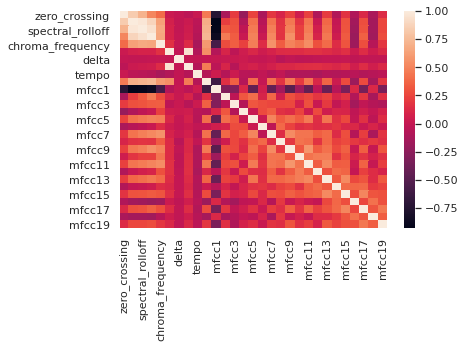

In [110]:
sns.heatmap(correlations)

**Question** 

1. Préparer vos données pour être en mesure d'apprendre des classifieurs et évaluer les erreurs en généralisation
2. Entraînez les méthodes suivantes
   - Arbres de décision (DecisionTreeClassifier)
   - NaiveBayes (GaussianNB)
   - Machine à vecteurs de support (SVC)
   - Régression Logistique (LogisticRegression)
3. Vérifiez si vous pouvez trouver de bons hyper-paramètres pour certaines méthodes
4. Concluez

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.33, random_state=42)

In [120]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
svc = SVC()
lr = LogisticRegression(max_iter=10000)
dt = DecisionTreeClassifier(max_depth=20)
methods = [dt, lr, svc, gnb]

In [127]:
from sklearn.metrics import f1_score

for m in methods:
    pred = m.fit(X_train, y_train).predict(X_test)
    score1 = f1_score(y_test, pred, average='micro')
    score2 = f1_score(y_test, pred, average='macro')
    print(m.__class__.__name__ + ": score1: " + str(score1) + ", score2: " + str(score2))

DecisionTreeClassifier: score1: 0.5373913043478261, score2: 0.5325965882762268
LogisticRegression: score1: 0.68, score2: 0.6757232737667799
SVC: score1: 0.3408695652173913, score2: 0.26833850719459573
GaussianNB: score1: 0.5721739130434783, score2: 0.5661092538069028


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['gini','entropy'],
              'max_depth':np.arange(2,11)}
